# London Air Quality Exploration

Enders Analysis: February 7, 2021

In [1]:
# import necessary libariaries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

# get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\Enders_Analysis


In [3]:
# read in air quality data for GLA 2020 and 2021
data_2020_2021 = pd.read_csv('data/processed/gl_AQ.csv')
sites_geo = pd.read_csv('data/processed/gla_codes.csv')
boroughs = gpd.read_file('data/raw/London_Borough_Excluding_MHW.shp')

In [4]:
data_2020_2021 = pd.merge(data_2020_2021, sites_geo, left_on="Site", right_on="code", how="left")

In [5]:
# gain insight into data_2020_2021
data_2020_2021.tail(25)

,Unnamed: 0_x,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Unnamed: 0_y,site,code,latitude,longitude,site_type
288350,2282,KC1,PM2.5,14/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288351,2283,KC1,PM2.5,15/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288352,2284,KC1,PM2.5,16/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288353,2285,KC1,PM2.5,17/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288354,2286,KC1,PM2.5,18/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288355,2287,KC1,PM2.5,19/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288356,2288,KC1,PM2.5,20/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288357,2289,KC1,PM2.5,21/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288358,2290,KC1,PM2.5,22/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background
288359,2291,KC1,PM2.5,23/01/2021 00:00,NaN,ug m-3,P,93.0,Kensington and Chelsea - North Ken,KC1,51.521047,-0.213492,Urban Background


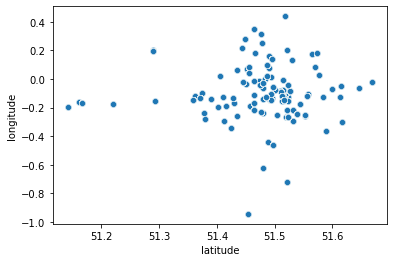

In [8]:
# gain insight into data_2020_2021
sns.scatterplot(data = data_2020_2021, x = 'latitude', y = 'longitude')

In [188]:
# find the unique codes (air quality monitors across GLA) in the dataset
code_list = data_2020_2021['code'].unique()
len(code_list)

125

In [6]:
data_2020_2021['Species'][data_2020_2021['Species']=="FINE"] = "PM2.5"

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
# find the unique types of pollutants in the dataset
pollutant_list = data_2020_2021['Species'].unique()
len(pollutant_list)

2

In [8]:
# plan
# code: 11 different codes 
# pollutant: types of pollutant, 15 different types
# date: 24 time stamps per day, need to take an average for the pollutant type for these values to get a daily average for each reading per code

# remove NA values from 'value'
# create new column with date, no time called "new_date"
# collapse on 'code', 'new_data', and 'pollutant' to get average of value (i.e. group_by code, new_date, and pollutant (take mean of value in the process) )

In [27]:
# gain insight into data_2020_2021
data_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288375 entries, 0 to 288374
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0_x             288375 non-null  int64  
 1   Site                     288375 non-null  object 
 2   Species                  288375 non-null  object 
 3   ReadingDateTime          288375 non-null  object 
 4   Value                    99446 non-null   float64
 5   Units                    288375 non-null  object 
 6   Provisional or Ratified  288375 non-null  object 
 7   Unnamed: 0_y             286068 non-null  float64
 8   site                     286068 non-null  object 
 9   code                     286068 non-null  object 
 10  latitude                 279147 non-null  float64
 11  longitude                279147 non-null  float64
 12  site_type                286068 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 30.8+ MB


## 1) GLA Borough Analysis

In [91]:
# keep rows only where 'value' is not NA
boroughs.NAME = boroughs.NAME.str.replace('Westminster', 'City of Westminster')

In [92]:
boroughs = boroughs.to_crs("EPSG:4326")

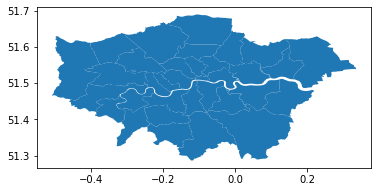

In [93]:
boroughs.plot()

In [94]:
data_2020_2021_gdf = gpd.GeoDataFrame(data_2020_2021, geometry=gpd.points_from_xy(data_2020_2021.longitude, data_2020_2021.latitude), crs=boroughs.crs)

In [95]:
data_2020_2021_gdf.crs

'EPSG:4326'

In [96]:
# buffer points to 400 meters so that they cover all boroughs
data_2020_2021_gdf = data_2020_2021_gdf.dropna(subset=['latitude','longitude'])
# buffer_length_in_meters = (5 * 1000) * 1.60934
data_2020_2021_gdf['geometry'] = data_2020_2021_gdf.geometry.buffer(0.009)

In [98]:
# data_2020_2021_gdf.plot()

In [99]:
boroughs_AQ = gpd.sjoin(data_2020_2021_gdf, boroughs, how='right')
boroughs_AQ = boroughs_AQ.groupby(['Species', 'GSS_CODE', 'ReadingDateTime']).mean()[['Value']].reset_index()

In [100]:
boroughs_AQ

,Species,GSS_CODE,ReadingDateTime,Value
0,NO2,E09000001,01/01/2019 00:00,39.416667
1,NO2,E09000001,01/01/2020 00:00,53.766667
2,NO2,E09000001,01/01/2021 00:00,30.371429
3,NO2,E09000001,01/02/2019 00:00,60.383333
4,NO2,E09000001,01/02/2020 00:00,33.660000
...,...,...,...,...
49211,PM2.5,E09000033,31/08/2020 00:00,6.800000
49212,PM2.5,E09000033,31/10/2019 00:00,25.311111
49213,PM2.5,E09000033,31/10/2020 00:00,7.155556
49214,PM2.5,E09000033,31/12/2019 00:00,20.387500


In [163]:
boroughs_AQ.GSS_CODE.unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000032', 'E09000033'], dtype=object)

In [102]:
boroughs_AQ[boroughs_AQ['Value'].isna()==True].GSS_CODE.unique()

array(['E09000006', 'E09000017', 'E09000018', 'E09000001', 'E09000002',
       'E09000003', 'E09000009', 'E09000010', 'E09000012', 'E09000013',
       'E09000014', 'E09000015', 'E09000016', 'E09000019', 'E09000021',
       'E09000025', 'E09000026', 'E09000027', 'E09000029', 'E09000030',
       'E09000032'], dtype=object)

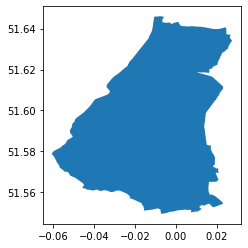

In [57]:
boroughs[boroughs['GSS_CODE']=='E09000031'].plot()

In [103]:
boroughs_AQ['ReadingDateTime'] = pd.to_datetime(boroughs_AQ['ReadingDateTime'], format='%d/%m/%Y %H:%M')

In [104]:
boroughs_AQ.to_csv('data/processed/AQ_boroughs.csv')

In [332]:
boroughs_AQ = pd.read_csv("data/processed/AQ_boroughs.csv")
boroughs_AQ['ReadingDateTime'] = pd.to_datetime(boroughs_AQ['ReadingDateTime'])
boroughs_AQ

,Unnamed: 0,Species,GSS_CODE,ReadingDateTime,Value
0,0,NO2,E09000001,2019-01-01,39.416667
1,1,NO2,E09000001,2020-01-01,53.766667
2,2,NO2,E09000001,2021-01-01,30.371429
3,3,NO2,E09000001,2019-02-01,60.383333
4,4,NO2,E09000001,2020-02-01,33.660000
...,...,...,...,...,...
49211,49211,PM2.5,E09000033,2020-08-31,6.800000
49212,49212,PM2.5,E09000033,2019-10-31,25.311111
49213,49213,PM2.5,E09000033,2020-10-31,7.155556
49214,49214,PM2.5,E09000033,2019-12-31,20.387500


In [333]:
boroughs_AQ_long = boroughs_AQ.pivot_table(index=["GSS_CODE","ReadingDateTime"], columns="Species", values="Value").reset_index()

In [334]:
boroughs_AQ_long['GSS_CODE'].unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000032', 'E09000033'], dtype=object)

In [336]:
for metric in list(boroughs_AQ_long.columns[2:].values):
    boroughs_AQ_long[f'SMA_3_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_7_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_10_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_30_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_45_{metric}'] = np.NaN
    
    for code in boroughs_AQ_long['GSS_CODE'].unique():
        # Calculate rolling averages for each borough
        boroughs_AQ_long[f'SMA_3_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=3).mean()
#     gla_total_long[f'SMA_5_{metric}'] = gla_total_long[metric].rolling(window=5).mean()
        boroughs_AQ_long[f'SMA_7_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=7).mean()
        boroughs_AQ_long[f'SMA_10_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=10).mean()
#     gla_total_long[f'SMA_20_{metric}'] = gla_total_long[metric].rolling(window=20).mean()
        boroughs_AQ_long[f'SMA_30_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=30).mean()
        boroughs_AQ_long[f'SMA_45_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=45).mean()

# calculate change from baseline for each code
boroughs_AQ_long['NO2_pc_change_from_baseline'] = np.NaN
boroughs_AQ_long['PM25_pc_change_from_baseline'] = np.NaN

for code in boroughs_AQ_long['GSS_CODE'].unique():
    boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['SMA_30_NO2'][boroughs_AQ_long['GSS_CODE']==code].pct_change(365, fill_method='pad').mul(100)
    boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['SMA_30_PM2.5'][boroughs_AQ_long['GSS_CODE']==code].pct_change(365, fill_method='pad').mul(100)

    
for code in boroughs_AQ_long['GSS_CODE'].unique():
    boroughs_AQ_long['NO2_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_NO2'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)].pct_change(731, fill_method='pad').mul(100)
    boroughs_AQ_long['PM25_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_PM2.5'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)].pct_change(731, fill_method='pad').mul(100)
#     boroughs_AQ_long['NO2_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year==2020)] = boroughs_AQ_long['SMA_30_NO2'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100)[boroughs_AQ_long['ReadingDateTime'].dt.year==2020]
#     boroughs_AQ_long['PM25_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year==2020)] = boroughs_AQ_long['SMA_30_PM2.5'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100)[boroughs_AQ_long['ReadingDateTime'].dt.year==2020]
    
boroughs_AQ_long['AQindex_pc_change_from_baseline'] = np.NaN
# final score
for code in boroughs_AQ_long['GSS_CODE'].unique():
    if len(boroughs_AQ_long[(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['PM2.5']).isna()==True]) > 500:
        boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code]
    
    elif len(boroughs_AQ_long[(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['NO2']).isna()==True]) > 500:
        boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code]
    
    else:
        boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = (boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] + boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code])/2

In [337]:
missing_code = boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=="E09000033"]
missing_code['GSS_CODE'] = "E09000031"
missing_code['AQindex_pc_change_from_baseline'] = np.NaN
# add empty row for code E0900031
boroughs_AQ_long = boroughs_AQ_long.append(missing_code)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


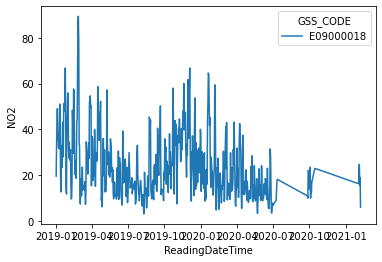

In [319]:
boroughs_AQ_long['ReadingDateTime'] = pd.to_datetime(boroughs_AQ_long['ReadingDateTime'])
sns.lineplot(data=boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=='E09000018'], x="ReadingDateTime", y="NO2", hue="GSS_CODE")

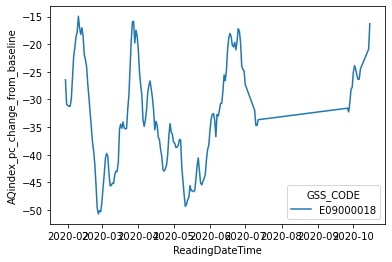

In [338]:
sns.lineplot(data=boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=='E09000018'], x="ReadingDateTime", y="AQindex_pc_change_from_baseline", hue="GSS_CODE")

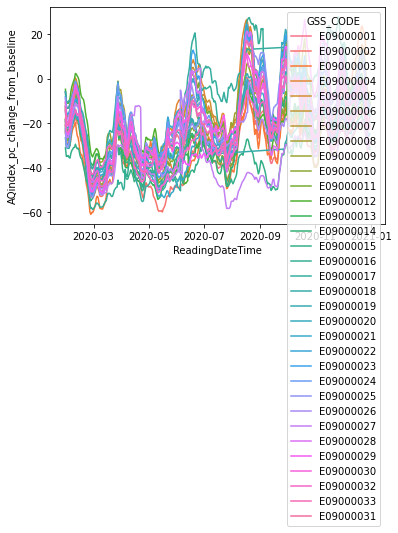

In [339]:
sns.lineplot(data=boroughs_AQ_long, x="ReadingDateTime", y="AQindex_pc_change_from_baseline", hue="GSS_CODE")

In [219]:
boroughs_AQ_long.to_csv('data/processed_final/AQ_boroughs.csv')

In [220]:
boroughs_AQ_long['GSS_CODE'].unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000032', 'E09000033', 'E09000031'], dtype=object)

## 2) GLA Analysis

In [265]:
# make new variable, gla_total, by using group_by on data_2020_2021 to group by 'new_date', and 'pollutant', taking the mean of 'value', and ignoring 'code', 'latitude', and 'longitude'
gla_total = data_2020_2021[data_2020_2021['Value'].notna()] 
gla_total = gla_total.groupby(['ReadingDateTime', 'Species'], as_index=False)['Value'].mean()
gla_total

,ReadingDateTime,Species,Value
0,01/01/2019 00:00,NO2,26.845745
1,01/01/2019 00:00,PM2.5,7.381250
2,01/01/2020 00:00,NO2,44.531633
3,01/01/2020 00:00,PM2.5,31.903030
4,01/01/2021 00:00,NO2,28.920619
...,...,...,...
1533,31/10/2020 00:00,PM2.5,7.479070
1534,31/12/2019 00:00,NO2,39.546078
1535,31/12/2019 00:00,PM2.5,20.084375
1536,31/12/2020 00:00,NO2,37.632292


In [266]:
# convert 'date_new' to date-time object
gla_total['ReadingDateTime'] = pd.to_datetime(gla_total['ReadingDateTime'], format='%d/%m/%Y %H:%M')
gla_total[gla_total['Species']=='NO2'].sort_values('ReadingDateTime').tail()

,ReadingDateTime,Species,Value
114,2021-02-03,NO2,36.734694
166,2021-02-04,NO2,37.865979
218,2021-02-05,NO2,35.370103
270,2021-02-06,NO2,30.094949
322,2021-02-07,NO2,10.031633


In [34]:
# remove weekends
# gla_total = gla_total[gla_total['ReadingDateTime'].dt.weekday < 5]

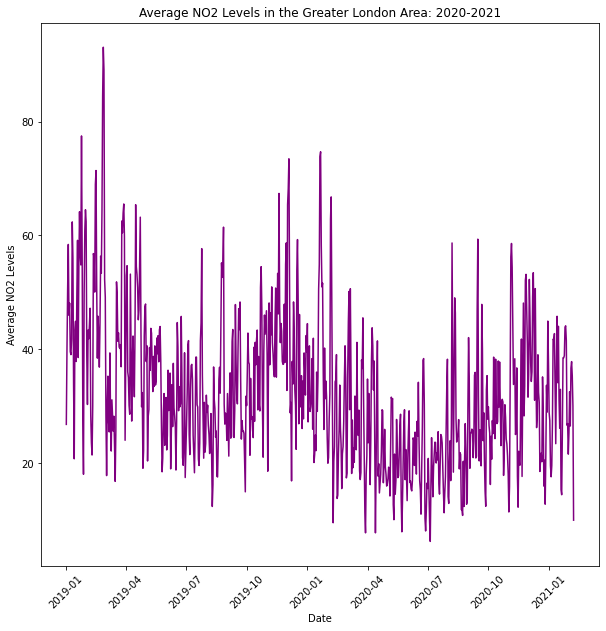

In [13]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# NO2
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total.sort_values('ReadingDateTime')['ReadingDateTime'][gla_total['Species']=='NO2'],
        gla_total.sort_values('ReadingDateTime')['Value'][gla_total['Species']=='NO2'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average NO2 Levels",
       title="Average NO2 Levels in the Greater London Area: 2020-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

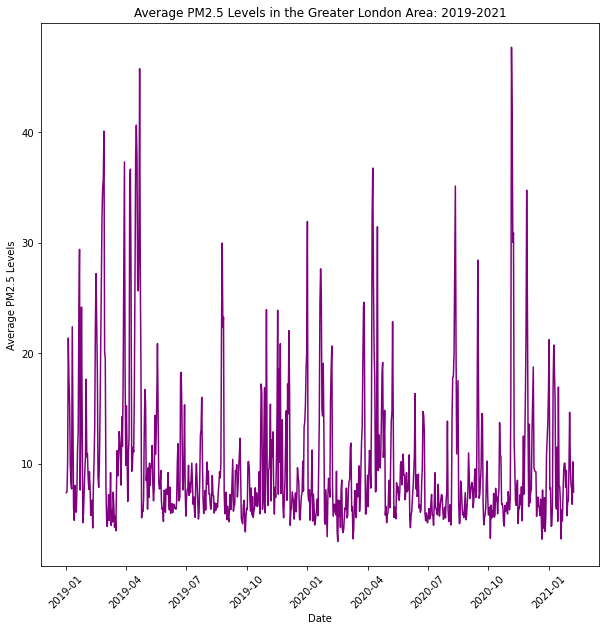

In [14]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# air_temp
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total.sort_values('ReadingDateTime')['ReadingDateTime'][gla_total['Species']=='PM2.5'],
        gla_total.sort_values('ReadingDateTime')['Value'][gla_total['Species']=='PM2.5'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average PM2.5 Levels",
       title="Average PM2.5 Levels in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [304]:
# pivot data for rolling average
gla_total_long = gla_total.pivot(index="ReadingDateTime", columns="Species", values="Value")

In [305]:
gla_total_long

Species,NO2,PM2.5
ReadingDateTime,,
2019-01-01,26.845745,7.381250
2019-01-02,39.938710,7.453125
2019-01-03,50.572340,10.084848
2019-01-04,58.429787,21.360606
2019-01-05,46.007368,17.621212
...,...,...
2021-02-03,36.734694,8.185366
2021-02-04,37.865979,7.711905
2021-02-05,35.370103,6.326829


In [306]:
for metric in list(gla_total_long.columns.values):
    gla_total_long[f'SMA_3_{metric}'] = gla_total_long[metric].rolling(window=3).mean()
    gla_total_long[f'SMA_5_{metric}'] = gla_total_long[metric].rolling(window=5).mean()
    gla_total_long[f'SMA_7_{metric}'] = gla_total_long[metric].rolling(window=7).mean()
    gla_total_long[f'SMA_10_{metric}'] = gla_total_long[metric].rolling(window=10).mean()
    gla_total_long[f'SMA_20_{metric}'] = gla_total_long[metric].rolling(window=20).mean()
    gla_total_long[f'SMA_30_{metric}'] = gla_total_long[metric].rolling(window=30).mean()
    gla_total_long[f'SMA_45_{metric}'] = gla_total_long[metric].rolling(window=45).mean()

In [307]:
gla_total_long

Species,NO2,PM2.5,SMA_3_NO2,SMA_5_NO2,SMA_7_NO2,SMA_10_NO2,SMA_20_NO2,SMA_30_NO2,SMA_45_NO2,SMA_3_PM2.5,SMA_5_PM2.5,SMA_7_PM2.5,SMA_10_PM2.5,SMA_20_PM2.5,SMA_30_PM2.5,SMA_45_PM2.5
ReadingDateTime,,,,,,,,,,,,,,,,
2019-01-01,26.845745,7.381250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,39.938710,7.453125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,50.572340,10.084848,39.118932,NaN,NaN,NaN,NaN,NaN,NaN,8.306408,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,58.429787,21.360606,49.646946,NaN,NaN,NaN,NaN,NaN,NaN,12.966193,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,46.007368,17.621212,51.669832,44.358790,NaN,NaN,NaN,NaN,NaN,16.355556,12.780208,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03,36.734694,8.185366,31.962560,28.588761,28.089803,32.622813,31.603434,32.584447,30.507690,11.010549,9.830627,8.710303,8.826508,8.406345,9.323675,9.102677
2021-02-04,37.865979,7.711905,33.720292,31.836651,29.684514,32.019819,31.293575,33.192317,30.898162,8.698257,10.049198,9.055209,8.595198,7.945401,9.434316,9.203430
2021-02-05,35.370103,6.326829,36.656925,33.824753,30.882841,31.141981,31.501410,33.462252,30.902410,7.408033,9.414076,9.027410,8.440822,7.860559,9.437487,9.174595


In [271]:
## SELECT ROLLING WINDOW
window = "45"

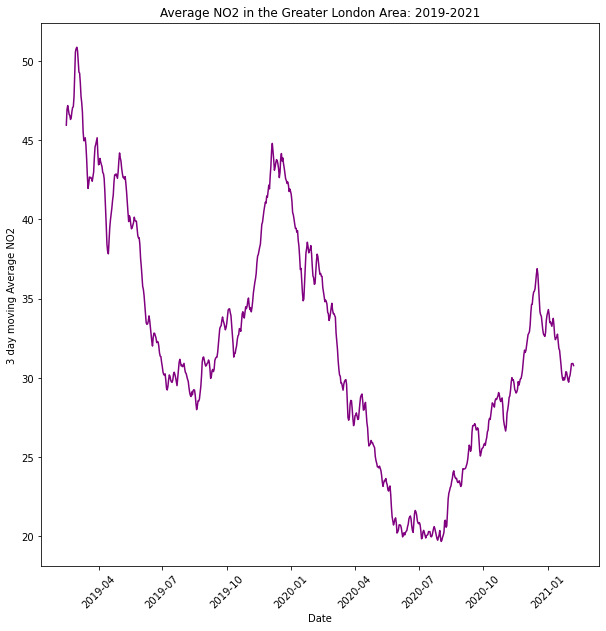

In [20]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# NO2
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.index,
        gla_total_long[f'SMA_{window}_NO2'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average NO2",
       title="Average NO2 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

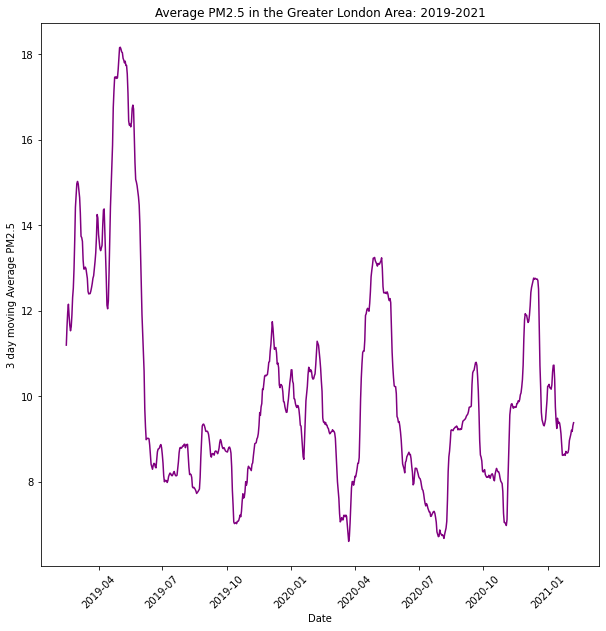

In [21]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.index,
        gla_total_long[f'SMA_{window}_PM2.5'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average PM2.5",
       title="Average PM2.5 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [308]:
gla_total_long = gla_total_long.reset_index()

In [309]:
# for 2020 data
gla_total_long['NO2_pc_change_from_baseline'] = gla_total_long['SMA_30_NO2'].pct_change(365, fill_method='pad').mul(100)
gla_total_long['PM25_pc_change_from_baseline'] = gla_total_long['SMA_30_PM2.5'].pct_change(365, fill_method='pad').mul(100)
# for 2021 data
gla_total_long['NO2_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['SMA_30_NO2'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]
gla_total_long['PM25_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['SMA_30_PM2.5'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]

gla_total_long['AQindex_pc_change_from_baseline'] = (gla_total_long['PM25_pc_change_from_baseline'] + gla_total_long['NO2_pc_change_from_baseline'])/2

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [313]:
# # for 2020 data
# gla_total_long['NO2_pc_change_from_baseline'] = gla_total_long['NO2'].pct_change(365, fill_method='pad').mul(100)
# gla_total_long['PM25_pc_change_from_baseline'] = gla_total_long['PM2.5'].pct_change(365, fill_method='pad').mul(100)
# # for 2021 data
# gla_total_long['NO2_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['NO2'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]
# gla_total_long['PM25_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['PM2.5'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]

# # calculate 30 day rolling average
# for metric in ['PM25_pc_change_from_baseline', 'NO2_pc_change_from_baseline']:
#     gla_total_long[f'SMA_30_{metric}'] = gla_total_long[metric].rolling(window=30).mean()

# gla_total_long['AQindex_pc_change_from_baseline'] = (gla_total_long['SMA_30_PM25_pc_change_from_baseline'] + gla_total_long['SMA_30_NO2_pc_change_from_baseline'])/2

In [310]:
gla_total_long

Species,ReadingDateTime,NO2,PM2.5,SMA_3_NO2,SMA_5_NO2,SMA_7_NO2,SMA_10_NO2,SMA_20_NO2,SMA_30_NO2,SMA_45_NO2,SMA_3_PM2.5,SMA_5_PM2.5,SMA_7_PM2.5,SMA_10_PM2.5,SMA_20_PM2.5,SMA_30_PM2.5,SMA_45_PM2.5,NO2_pc_change_from_baseline,PM25_pc_change_from_baseline,AQindex_pc_change_from_baseline
0,2019-01-01,26.845745,7.381250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,39.938710,7.453125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,50.572340,10.084848,39.118932,NaN,NaN,NaN,NaN,NaN,NaN,8.306408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,58.429787,21.360606,49.646946,NaN,NaN,NaN,NaN,NaN,NaN,12.966193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,46.007368,17.621212,51.669832,44.358790,NaN,NaN,NaN,NaN,NaN,16.355556,12.780208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2021-02-03,36.734694,8.185366,31.962560,28.588761,28.089803,32.622813,31.603434,32.584447,30.507690,11.010549,9.830627,8.710303,8.826508,8.406345,9.323675,9.102677,-31.287791,-21.701493,-26.494642
765,2021-02-04,37.865979,7.711905,33.720292,31.836651,29.684514,32.019819,31.293575,33.192317,30.898162,8.698257,10.049198,9.055209,8.595198,7.945401,9.434316,9.203430,-29.802101,-18.504198,-24.153149
766,2021-02-05,35.370103,6.326829,36.656925,33.824753,30.882841,31.141981,31.501410,33.462252,30.902410,7.408033,9.414076,9.027410,8.440822,7.860559,9.437487,9.174595,-29.041595,-17.019659,-23.030627
767,2021-02-06,30.094949,10.174419,34.443677,33.325186,32.092615,29.995965,31.696776,33.071943,30.910812,8.071051,8.519204,9.535320,8.518528,7.972701,9.209634,9.308010,-30.245738,-18.512435,-24.379087


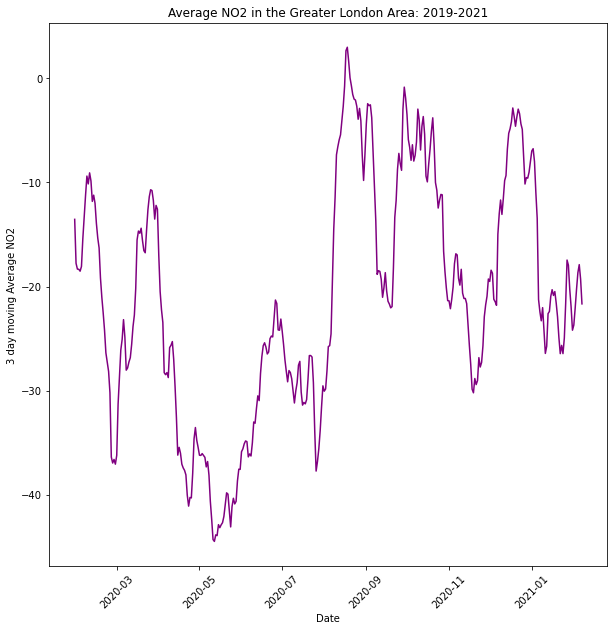

In [299]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['SMA_30_NO2_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average NO2",
       title="Average NO2 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

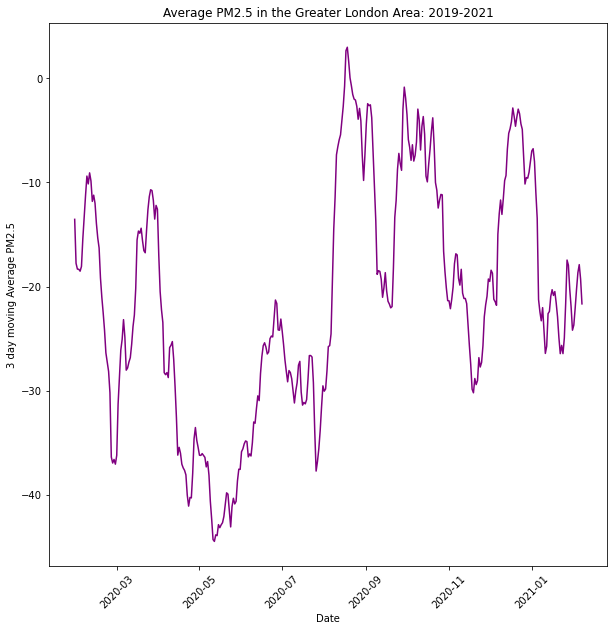

In [300]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['SMA_30_NO2_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average PM2.5",
       title="Average PM2.5 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

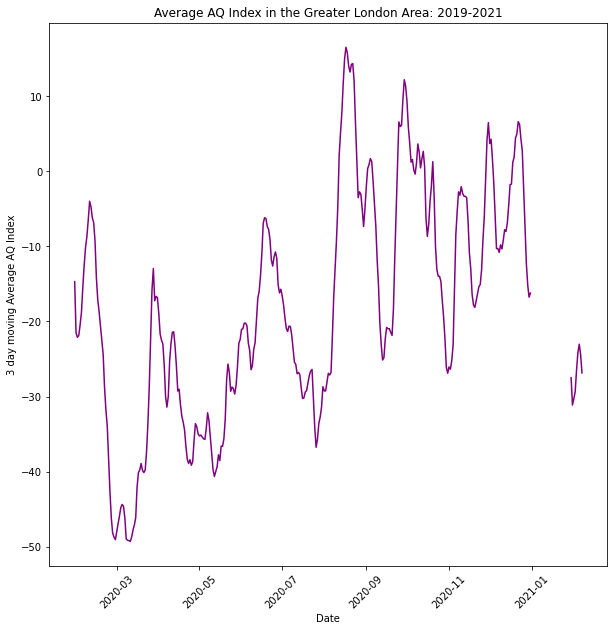

In [311]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['AQindex_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average AQ Index",
       title="Average AQ Index in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [312]:
gla_total_long.to_csv('data/processed_final/AQ_gla.csv')

In [302]:
gla_total_long.tail(50)

Species,ReadingDateTime,NO2,PM2.5,NO2_pc_change_from_baseline,PM25_pc_change_from_baseline,SMA_30_PM25_pc_change_from_baseline,SMA_30_NO2_pc_change_from_baseline,AQindex_pc_change_from_baseline
719,2020-12-20,21.820619,5.265854,-27.023783,7.216334,38.600246,-4.599948,17.000149
720,2020-12-21,20.294737,3.178049,-33.420586,-48.999676,38.092268,-3.705696,17.193286
721,2020-12-22,35.178947,7.624390,-0.607596,7.213202,39.725854,-2.952367,18.386744
722,2020-12-23,29.716842,4.170732,13.763620,-43.898690,38.614757,-3.392988,17.610885
723,2020-12-24,16.018182,4.271429,-53.511039,-58.286830,36.106831,-4.370484,15.868173
724,2020-12-25,20.563636,6.932558,-26.074405,-7.811727,31.701977,-4.895650,13.403163
725,2020-12-26,12.842268,3.874419,-67.395676,-70.937709,24.978782,-7.434895,8.771943
726,2020-12-27,21.671134,5.351220,-40.479949,-61.118397,17.567402,-10.149942,3.708730
727,2020-12-28,33.700000,10.746341,5.325408,-29.736232,10.190259,-9.528989,0.330635
728,2020-12-29,29.004124,12.295122,-31.641466,-33.508168,6.696176,-9.587500,-1.445662


<AxesSubplot:xlabel='latitude'>

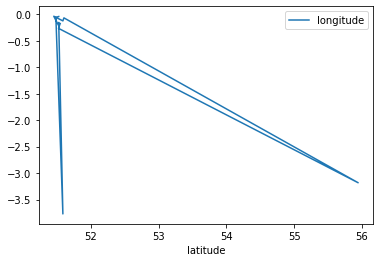

In [33]:
data_grouped.plot(x = 'latitude', y = 'longitude')

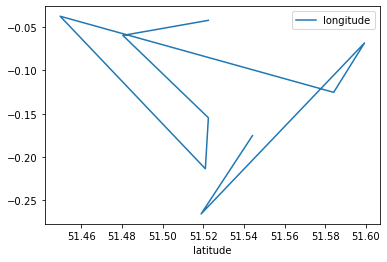

In [49]:
data_grouped = data_grouped[(data_grouped['latitude']<55) & (data_grouped['longitude']> -0.5) ]

In [46]:
# remove points that do not fall within the GLA boundary
data_grouped['latitude'].max()

55.945589

In [51]:
data_grouped.head

AttributeError: 'AxesSubplot' object has no attribute 'head'

In [ ]:
data_grouped = data_grouped[(data_grouped['latitude']<55) & (data_grouped['longitude']> -0.5) ]